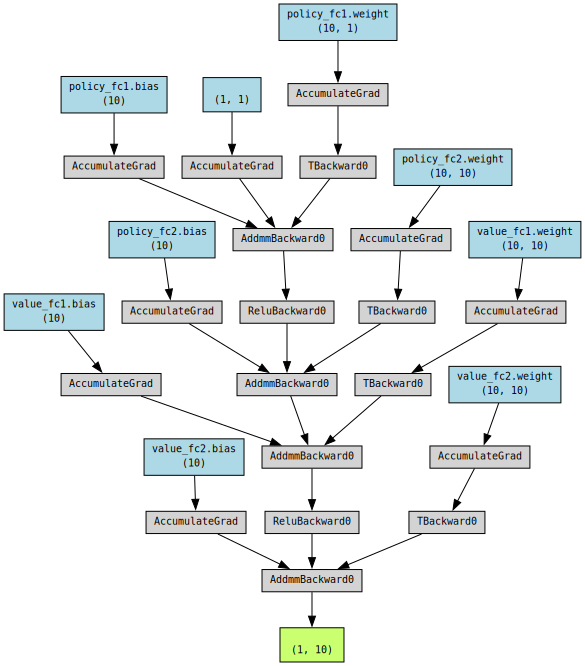

In [19]:
from contextlib import contextmanager
from itertools import chain
from typing import Generic, TypeVar
from torchviz import make_dot
import torch as t
import torch.nn as nn

class ValueNet(nn.Module):
    def __init__(self):
        super(ValueNet, self).__init__()
        self.value_fc1 = nn.Linear(10, 10)
        self.value_fc2 = nn.Linear(10, 10)
    
    def forward(self, x):
        x = t.relu(self.value_fc1(x))
        x = self.value_fc2(x)
        return x

class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()
        self.policy_fc1 = nn.Linear(1, 10)
        self.policy_fc2 = nn.Linear(10, 10)
    
    def forward(self, x):
        x = t.relu(self.policy_fc1(x))
        x = self.policy_fc2(x)
        return x

value = ValueNet()
policy = PolicyNet()

# x = t.randn(1, 1, requires_grad=True)
# make_dot(value(x), params={name: param for name, param in value.named_parameters() })



# with frozen(value) as value:
x = t.randn(1, 1, requires_grad=True)
di = make_dot(value(policy(x)), params={name: param for name, param in chain(value.named_parameters(), policy.named_parameters(),) })
di